# 202201 인구현황 분석하기

자료이용
- https://www.mois.go.kr/frt/a01/frtMain.do(행정안정부->주민등록인구통계)
- 202201 인구현황

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

In [2]:
# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False)
# 선명하게 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_9108\2863771375.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
df = pd.read_csv("data/202201_202206_연령별인구현황_월간.csv", encoding = 'cp949')

In [4]:
df.head()

,행정구역,2022년01월_거주자_총인구수,2022년01월_거주자_0~9세,2022년01월_거주자_10~19세,2022년01월_거주자_20~29세,2022년01월_거주자_30~39세,2022년01월_거주자_40~49세,2022년01월_거주자_50~59세,2022년01월_거주자_60~69세,2022년01월_거주자_70~79세,...,2022년06월_여_거주자_10~19세,2022년06월_여_거주자_20~29세,2022년06월_여_거주자_30~39세,2022년06월_여_거주자_40~49세,2022년06월_여_거주자_50~59세,2022년06월_여_거주자_60~69세,2022년06월_여_거주자_70~79세,2022년06월_여_거주자_80~89세,2022년06월_여_거주자_90~99세,2022년06월_여_거주자_100세 이상
0,전국 (0000000000),"51,311,951","3,734,657","4,697,725","6,610,316","6,666,658","8,101,102","8,551,128","7,134,103","3,702,467",...,"2,269,562","3,104,493","3,193,889","3,977,236","4,239,024","3,670,338","2,055,878","1,215,166","208,282","6,119"
1,서울특별시 (1100000000),"9,398,649","579,102","752,225","1,410,041","1,425,783","1,459,967","1,479,988","1,267,387","688,460",...,"366,185","731,556","710,266","733,334","752,315","669,620","382,725","184,023","30,393",926
2,부산광역시 (2600000000),"3,328,708","218,408","265,621","412,440","402,009","498,014","548,508","545,947","297,599",...,"128,630","195,442","194,217","245,704","279,312","289,186","166,170","81,109","12,302",305
3,대구광역시 (2700000000),"2,372,283","166,818","217,987","306,851","282,591","369,467","415,876","341,076","177,988",...,"104,620","141,614","132,760","185,395","212,065","179,922","101,806","54,955","8,095",217
4,인천광역시 (2800000000),"2,928,763","215,957","270,463","388,128","398,385","477,249","505,283","397,917","178,865",...,"131,392","183,584","192,100","233,258","253,869","204,577","99,236","55,491","10,275",313


## 전처리 과정

- 컬럼 정리
- 남,여 구분 하기
- 나이대 구분해서 정리하기

In [5]:
columns = ['행정구역','2022년01월_남_거주자_총인구수','2022년01월_남_거주자_연령구간인구수','2022년01월_남_거주자_0~9세',
           '2022년01월_남_거주자_10~19세','2022년01월_남_거주자_20~29세','2022년01월_남_거주자_30~39세','2022년01월_남_거주자_40~49세',
           '2022년01월_남_거주자_50~59세','2022년01월_남_거주자_60~69세','2022년01월_남_거주자_70~79세','2022년01월_남_거주자_80~89세',
           '2022년01월_남_거주자_90~99세','2022년01월_남_거주자_100세 이상']
df_1 = df[columns].copy() # columns 복사하기
df_1.columns = ['행정구역','총인구수','연령구간인구수','10대미만','10대','20대','30대','40대','50대','60대','70대',
                '80대','90대','100대 이상']

In [6]:
columns = ['행정구역','2022년01월_여_거주자_총인구수','2022년01월_여_거주자_연령구간인구수','2022년01월_여_거주자_0~9세',
           '2022년01월_여_거주자_10~19세','2022년01월_여_거주자_20~29세','2022년01월_여_거주자_30~39세','2022년01월_여_거주자_40~49세',
           '2022년01월_여_거주자_50~59세','2022년01월_여_거주자_60~69세','2022년01월_여_거주자_70~79세','2022년01월_여_거주자_80~89세',
           '2022년01월_여_거주자_90~99세','2022년01월_여_거주자_100세 이상']
df_2 = df[columns].copy() # columns 복사하기
df_2.columns = ['행정구역','총인구수','연령구간인구수','10대미만','10대','20대','30대','40대','50대','60대','70대',
                '80대','90대','100대 이상']

In [7]:
# 남성 따로 테이블로 만들기
df_1['성별'] = '남'
df_1.head()

,행정구역,총인구수,연령구간인구수,10대미만,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대 이상,성별
0,전국 (0000000000),"25,572,304","25,572,304","1,914,414","2,424,985","3,467,745","3,443,618","4,113,193","4,318,084","3,493,624","1,679,773","657,582","58,172","1,114",남
1,서울특별시 (1100000000),"4,561,509","4,561,509","297,383","385,722","678,346","712,144","722,516","727,839","597,948","313,067","116,185","10,115",244,남
2,부산광역시 (2600000000),"1,627,712","1,627,712","112,086","136,828","213,676","206,226","251,079","266,973","257,523","134,574","45,430","3,264",53,남
3,대구광역시 (2700000000),"1,168,125","1,168,125","85,496","113,508","163,260","148,319","182,188","203,224","162,133","78,236","29,531","2,200",30,남
4,인천광역시 (2800000000),"1,465,317","1,465,317","110,855","138,962","202,283","206,366","244,189","251,805","196,791","82,176","29,111","2,712",67,남


In [8]:
# 여성 따로 테이블로 만들기
df_2['성별'] = '여'
df_2.head()

,행정구역,총인구수,연령구간인구수,10대미만,10대,20대,30대,40대,50대,60대,70대,80대,90대,100대 이상,성별
0,전국 (0000000000),"25,739,647","25,739,647","1,820,243","2,272,740","3,142,571","3,223,040","3,987,909","4,233,044","3,640,479","2,022,694","1,185,160","205,737","6,030",여
1,서울특별시 (1100000000),"4,837,140","4,837,140","281,719","366,503","731,695","713,639","737,451","752,149","669,439","375,393","177,946","30,264",942,여
2,부산광역시 (2600000000),"1,700,996","1,700,996","106,322","128,793","198,764","195,783","246,935","281,535","288,424","163,025","79,028","12,091",296,여
3,대구광역시 (2700000000),"1,204,158","1,204,158","81,322","104,479","143,591","134,272","187,279","212,652","178,943","99,752","53,704","7,962",202,여
4,인천광역시 (2800000000),"1,463,446","1,463,446","105,102","131,501","185,845","192,019","233,060","253,478","201,126","96,689","54,115","10,195",316,여


In [9]:
columns = ['행정구역','총인구수','연령구간인구수','10대미만','성별']
df_1_1 = df_1[columns].copy() # columns 복사하기
# df_1.columns = ['행정구역','총인구수','연령구간인구수','10대미만','10대','20대','30대','40대','50대','60대','70대','80대','90대','100대 이상']

In [10]:
# 나이대별로 구분하기 남성
columns = ['행정구역','총인구수','연령구간인구수','10대','성별']
df_1_2 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','20대','성별']
df_1_3 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','30대','성별']
df_1_4 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','40대','성별']
df_1_5 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','50대','성별']
df_1_6 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','60대','성별']
df_1_7= df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','70대','성별']
df_1_8 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','80대','성별']
df_1_9 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','90대','성별']
df_1_10 = df_1[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','100대 이상','성별']
df_1_11 = df_1[columns].copy() # columns 복사하기

In [11]:
# 나이대별로 구분하기 여성

columns = ['행정구역','총인구수','연령구간인구수','10대미만','성별']
df_2_1 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','10대','성별']
df_2_2 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','20대','성별']
df_2_3 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','30대','성별']
df_2_4 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','40대','성별']
df_2_5 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','50대','성별']
df_2_6 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','60대','성별']
df_2_7= df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','70대','성별']
df_2_8 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','80대','성별']
df_2_9 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','90대','성별']
df_2_10 = df_2[columns].copy() # columns 복사하기

columns = ['행정구역','총인구수','연령구간인구수','100대 이상','성별']
df_2_11 = df_2[columns].copy() # columns 복사하기

In [12]:
# 컬럼명 변경(남성)
df_1_1.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_2.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_3.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_4.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_5.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_6.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_7.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_8.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_9.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_10.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_1_11.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']

In [13]:
# 컬럼명 변경(여성)
df_2_1.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_2.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_3.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_4.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_5.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_6.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_7.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_8.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_9.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_10.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']
df_2_11.columns = ['행정구역','총인구수','연령구간인구수',' 연령별_인구수','성별']

In [14]:
df_1_1['연령구간'] = '10대미만'
df_1_2['연령구간'] = '10대'
df_1_3['연령구간'] = '20대'
df_1_4['연령구간'] = '30대'
df_1_5['연령구간'] = '40대'
df_1_6['연령구간'] = '50대'
df_1_7['연령구간'] = '60대'
df_1_8['연령구간'] = '70대'
df_1_9['연령구간'] = '80대'
df_1_10['연령구간'] = '90대'
df_1_11['연령구간'] = '100대 이상'

In [15]:
df_2_1['연령구간'] = '10대미만'
df_2_2['연령구간'] = '10대'
df_2_3['연령구간'] = '20대'
df_2_4['연령구간'] = '30대'
df_2_5['연령구간'] = '40대'
df_2_6['연령구간'] = '50대'
df_2_7['연령구간'] = '60대'
df_2_8['연령구간'] = '70대'
df_2_9['연령구간'] = '80대'
df_2_10['연령구간'] = '90대'
df_2_11['연령구간'] = '100대 이상'

In [16]:
df_2_11.head()

,행정구역,총인구수,연령구간인구수,연령별_인구수,성별,연령구간
0,전국 (0000000000),"25,739,647","25,739,647","6,030",여,100대 이상
1,서울특별시 (1100000000),"4,837,140","4,837,140",942,여,100대 이상
2,부산광역시 (2600000000),"1,700,996","1,700,996",296,여,100대 이상
3,대구광역시 (2700000000),"1,204,158","1,204,158",202,여,100대 이상
4,인천광역시 (2800000000),"1,463,446","1,463,446",316,여,100대 이상


In [17]:
# 남성테이블 합병
p_df = pd.concat([df_1_1,df_1_2,df_1_3,df_1_4,df_1_5,df_1_6,df_1_7,df_1_8,df_1_9,df_1_10,df_1_11])

In [18]:
# 여성테이블 합병
p_df_1 = pd.concat([p_df,df_2_1,df_2_2,df_2_3,df_2_4,df_2_5,df_2_6,df_2_7,df_2_8,df_2_9,df_2_10,df_2_11])

In [19]:
# 행정구역 뒤에 번호 없애기
def parse_region(data):
    parse = data.split(" ")[0] # 뒤에 있는 문자 가져오기
    parse = parse.replace(' ', '') # 공백 없애기
    return parse

In [20]:
p_df_1["행정구역"] = p_df_1["행정구역"].apply(parse_region) # 함수적용

In [21]:
# 태블로에 맵 시각화 사용하기 위해 추가하기
p_df_1['국가'] = '대한민국'
p_df_1.head(10)

,행정구역,총인구수,연령구간인구수,연령별_인구수,성별,연령구간,국가
0,전국,"25,572,304","25,572,304","1,914,414",남,10대미만,대한민국
1,서울특별시,"4,561,509","4,561,509","297,383",남,10대미만,대한민국
2,부산광역시,"1,627,712","1,627,712","112,086",남,10대미만,대한민국
3,대구광역시,"1,168,125","1,168,125","85,496",남,10대미만,대한민국
4,인천광역시,"1,465,317","1,465,317","110,855",남,10대미만,대한민국
5,광주광역시,"709,919","709,919","58,075",남,10대미만,대한민국
6,대전광역시,"719,888","719,888","54,986",남,10대미만,대한민국
7,울산광역시,"573,612","573,612","46,925",남,10대미만,대한민국
8,세종특별자치시,"186,504","186,504","24,029",남,10대미만,대한민국
9,경기도,"6,785,711","6,785,711","559,399",남,10대미만,대한민국


In [22]:
p_df_1.head(10)

,행정구역,총인구수,연령구간인구수,연령별_인구수,성별,연령구간,국가
0,전국,"25,572,304","25,572,304","1,914,414",남,10대미만,대한민국
1,서울특별시,"4,561,509","4,561,509","297,383",남,10대미만,대한민국
2,부산광역시,"1,627,712","1,627,712","112,086",남,10대미만,대한민국
3,대구광역시,"1,168,125","1,168,125","85,496",남,10대미만,대한민국
4,인천광역시,"1,465,317","1,465,317","110,855",남,10대미만,대한민국
5,광주광역시,"709,919","709,919","58,075",남,10대미만,대한민국
6,대전광역시,"719,888","719,888","54,986",남,10대미만,대한민국
7,울산광역시,"573,612","573,612","46,925",남,10대미만,대한민국
8,세종특별자치시,"186,504","186,504","24,029",남,10대미만,대한민국
9,경기도,"6,785,711","6,785,711","559,399",남,10대미만,대한민국


In [23]:
p_df_1.tail(10)

,행정구역,총인구수,연령구간인구수,연령별_인구수,성별,연령구간,국가
8,세종특별자치시,"187,121","187,121",22,여,100대 이상,대한민국
9,경기도,"6,702,418","6,702,418","1,276",여,100대 이상,대한민국
10,강원도,"761,067","761,067",281,여,100대 이상,대한민국
11,충청북도,"784,055","784,055",227,여,100대 이상,대한민국
12,충청남도,"1,032,097","1,032,097",354,여,100대 이상,대한민국
13,전라북도,"893,821","893,821",346,여,100대 이상,대한민국
14,전라남도,"907,495","907,495",406,여,100대 이상,대한민국
15,경상북도,"1,297,246","1,297,246",489,여,100대 이상,대한민국
16,경상남도,"1,638,568","1,638,568",342,여,100대 이상,대한민국
17,제주특별자치도,"335,570","335,570",181,여,100대 이상,대한민국


In [24]:
p_df_1.to_csv('연령별인구_1월_연령별분리.csv')

In [25]:
p_df_1['행정구역'].unique()

array(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시',
       '울산광역시', '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
       '경상북도', '경상남도', '제주특별자치도'], dtype=object)

In [26]:
p_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 0 to 17
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   행정구역      396 non-null    object
 1   총인구수      396 non-null    object
 2   연령구간인구수   396 non-null    object
 3    연령별_인구수  396 non-null    object
 4   성별        396 non-null    object
 5   연령구간      396 non-null    object
 6   국가        396 non-null    object
dtypes: object(7)
memory usage: 24.8+ KB


In [27]:
# 숫자에 , 없애고 int형 변환
p_df_1["총인구수"] = p_df_1["총인구수"].str.replace(',', '').astype(int)
p_df_1["연령구간인구수"] = p_df_1["연령구간인구수"].str.replace(',', '').astype(int)
p_df_1[' 연령별_인구수'] = p_df_1[' 연령별_인구수'].str.replace(',', '').astype(int)

In [28]:
# 합계 확인(예시)
p_df_1['연령구간인구수'][p_df_1["행정구역"] == "경기도"].sum()

148369419

## 시각화과정

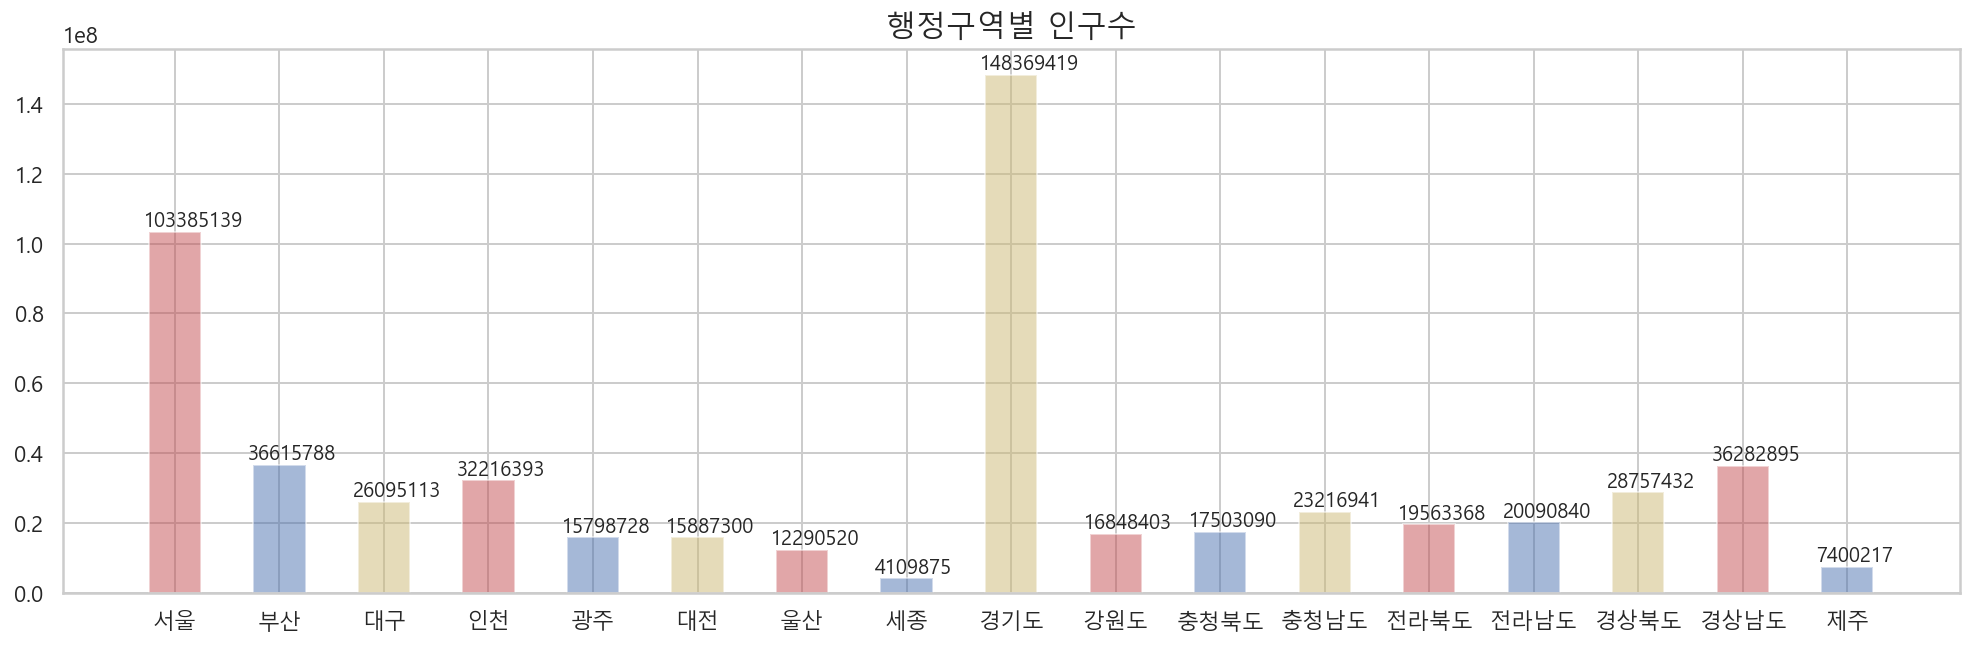

In [29]:
# '전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시','울산광역시', '세종특별자치시', 
# '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도',
# '경상북도', '경상남도', '제주특별자치도'
df_1 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "서울특별시"].sum()
df_2 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "부산광역시"].sum()
df_3 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "대구광역시"].sum()
df_4 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "인천광역시"].sum()
df_5 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "광주광역시"].sum()
df_6 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "대전광역시"].sum()
df_7 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "울산광역시"].sum()
df_8 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "세종특별자치시"].sum()
df_9 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "경기도"].sum()
df_10 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "강원도"].sum()
df_11 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "충청북도"].sum()
df_12 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "충청남도"].sum()
df_13 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "전라북도"].sum()
df_14 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "전라남도"].sum()
df_15 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "경상북도"].sum()
df_16 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "경상남도"].sum()
df_17 = p_df_1['연령구간인구수'][p_df_1["행정구역"] == "제주특별자치도"].sum()

x = ['서울', '부산', '대구', '인천', '광주', '대전','울산', '세종','경기도',
     '강원도', '충청북도', '충청남도', '전라북도', '전라남도','경상북도', '경상남도', '제주']
y = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17]

plt.figure(figsize=(17,5))
plt.title("행정구역별 인구수", fontsize = 15)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
plt.bar(x, y,color = ['r', 'b', 'y'], width = 0.5, alpha = 0.5)
for index, value in enumerate(y):
    plt.text(index - 0.3, value, str(value), fontsize = 10, verticalalignment='bottom')
    # plt.text(x좌표, y좌표, text)
plt.show()

# 경기도, 서울, 부산, 경상남도, 인천, 경상북도, 대구, 충청남도, 전라남도, 전라북도, 충청북도, 강원도, 대전, 광주, 제주, 세종

- 1위: 경기도 / 2위: 서울 / 3위:부산 순서인 것을 알 수 있다.
- 세종특별자치시의 인구수가 가장 적다는 것을 알 수 있다.

In [30]:
p_df_1['연령구간'].unique()

array(['10대미만', '10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대',
       '90대', '100대 이상'], dtype=object)

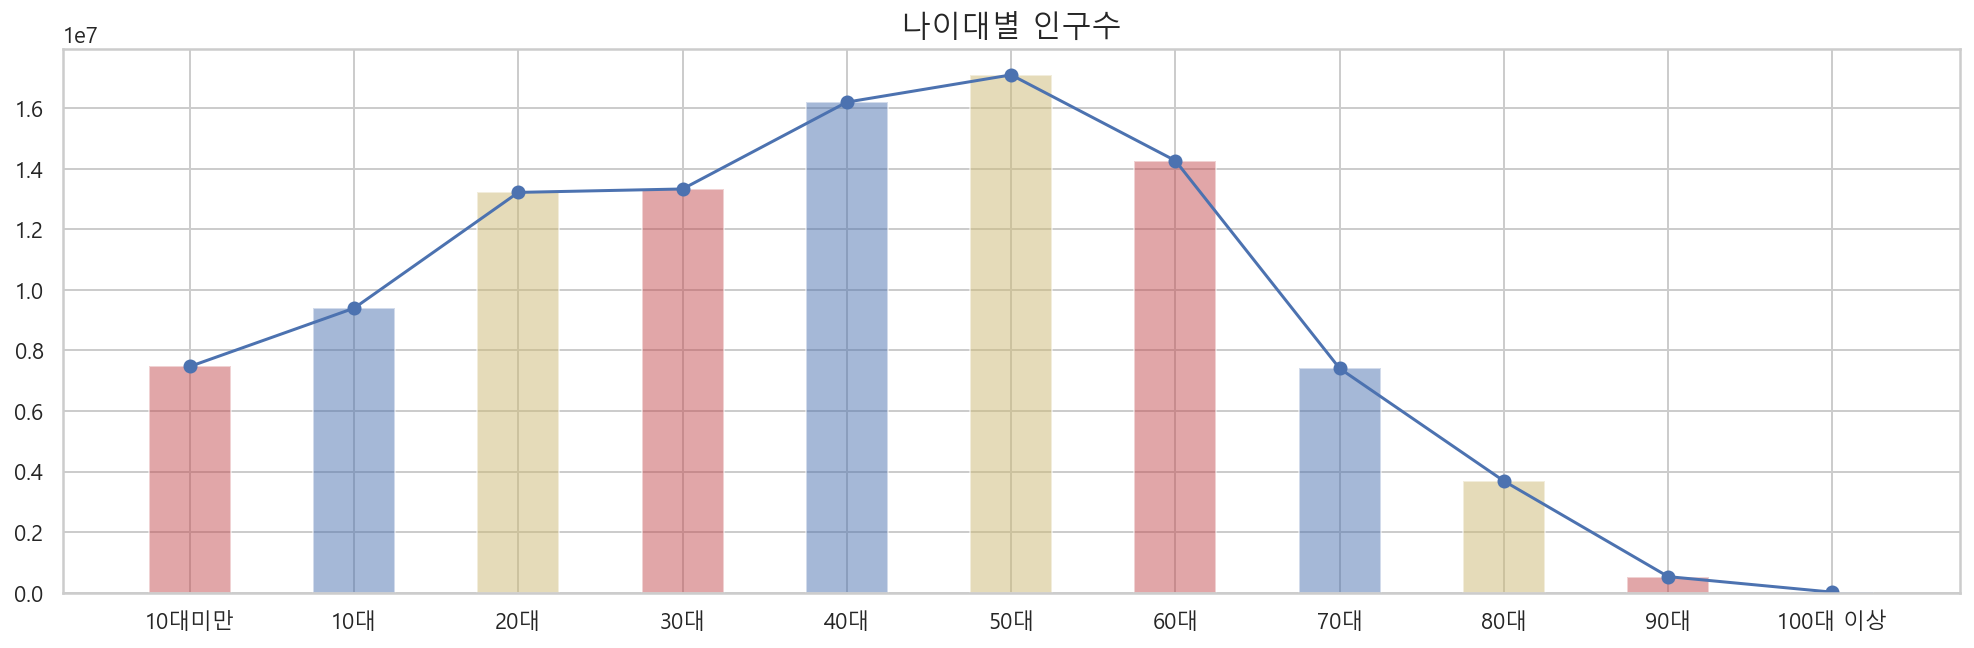

In [31]:
df_1 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "10대미만"].sum()
df_2 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "10대"].sum()
df_3 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "20대"].sum()
df_4 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "30대"].sum()
df_5 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "40대"].sum()
df_6 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "50대"].sum()
df_7 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "60대"].sum()
df_8 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "70대"].sum()
df_9 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "80대"].sum()
df_10 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "90대"].sum()
df_11 = p_df_1[' 연령별_인구수'][p_df_1["연령구간"] == "100대 이상"].sum()

x = ['10대미만', '10대', '20대', '30대', '40대', '50대','60대', '70대','80대', '90대', '100대 이상']
y = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11]

plt.figure(figsize=(17,5))
plt.title("나이대별 인구수", fontsize = 15)
plt.bar(x, y,color = ['r', 'b', 'y'], width = 0.5, alpha = 0.5)
plt.plot(x, y, color = 'b', linestyle = 'solid', marker = 'o', label = "Temperature")

plt.show()

# 50대, 40대, 60대가 가장 많았다.

- 50대, 40대, 60대가 가장 많다는 것을 알 수 있다. 
- 10대미만, 10대의 인구수가 50대, 40대보다 적다는 것을 알 수 있다.

In [32]:
p_df_m = p_df_1[p_df_1["성별"] == "남"]
p_df_f = p_df_1[p_df_1["성별"] == "여"]

In [33]:
p_df_1.head()

,행정구역,총인구수,연령구간인구수,연령별_인구수,성별,연령구간,국가
0,전국,25572304,25572304,1914414,남,10대미만,대한민국
1,서울특별시,4561509,4561509,297383,남,10대미만,대한민국
2,부산광역시,1627712,1627712,112086,남,10대미만,대한민국
3,대구광역시,1168125,1168125,85496,남,10대미만,대한민국
4,인천광역시,1465317,1465317,110855,남,10대미만,대한민국


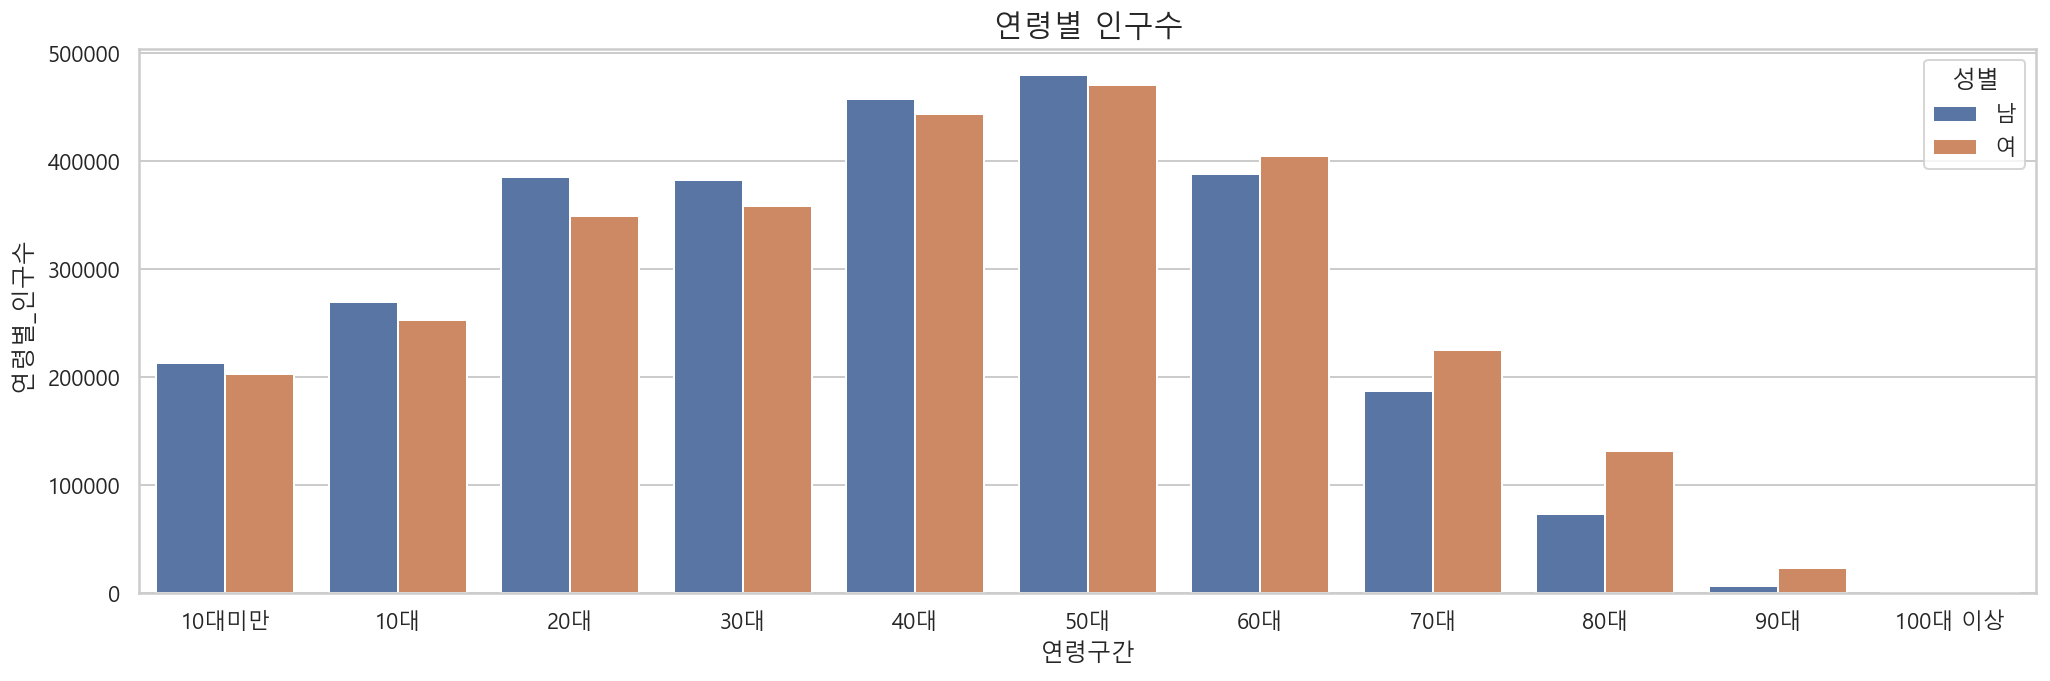

In [34]:
plt.figure(figsize=(17,5))
plt.title("연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_1, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()


- 10대미만 ~ 50대는 남성이 여성보다 많지만 60대부터는 여성이 더 많다는 것을 알 수 있다.
- 남녀의 인구수가 비슷하다는 것을 알 수 있다.(크게 차이가 나지 않는다.)

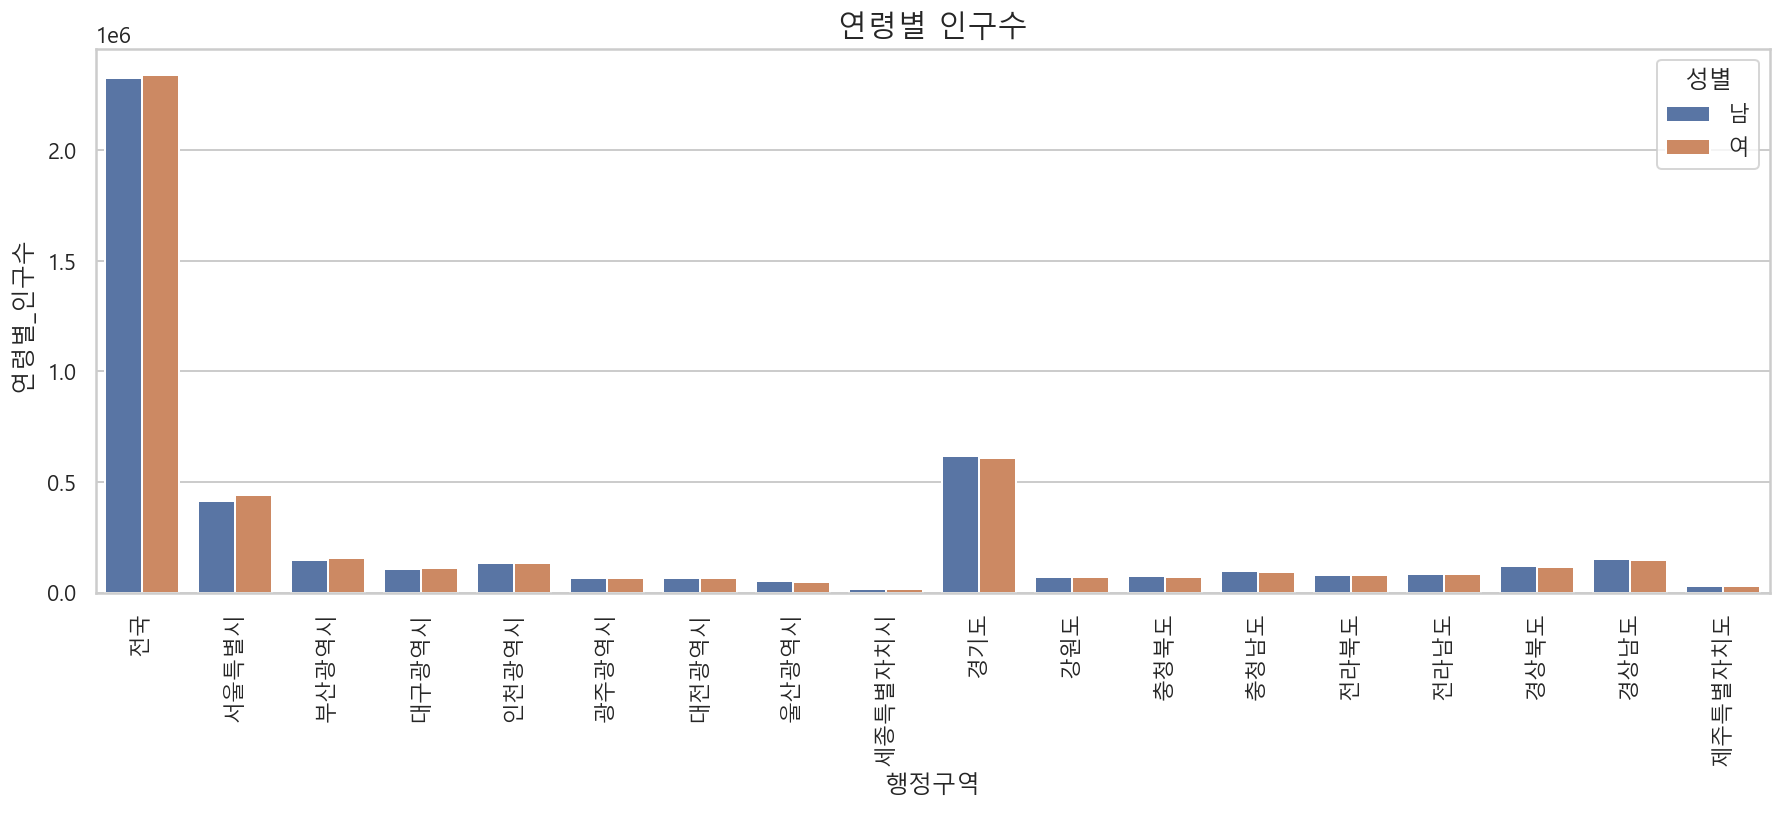

In [43]:
plt.figure(figsize=(15,5))
plt.title("연령별 인구수", fontsize = 15)
plt.xticks(rotation=90)
sns.barplot(data=p_df_1, x="행정구역", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()

# 남녀의 비율이 비슷한 비율인 것을 알 수 있다.

### 지역별 비교하기
##### 경기도, 서울, 부산, 경상남도, 인천

In [44]:
p_df_g = p_df_1[p_df_1["행정구역"] == "경기도"] # 1위
p_df_s = p_df_1[p_df_1["행정구역"] == "서울특별시"] # 2위
p_df_b = p_df_1[p_df_1["행정구역"] == "부산광역시"] # 3위
p_df_gn = p_df_1[p_df_1["행정구역"] == "경상남도"] #4위
p_df_in = p_df_1[p_df_1["행정구역"] == "인천광역시"] #5위

#### 경기도 연령별 인구수

- 40대~50대가 많다는 것을 알 수 있다.

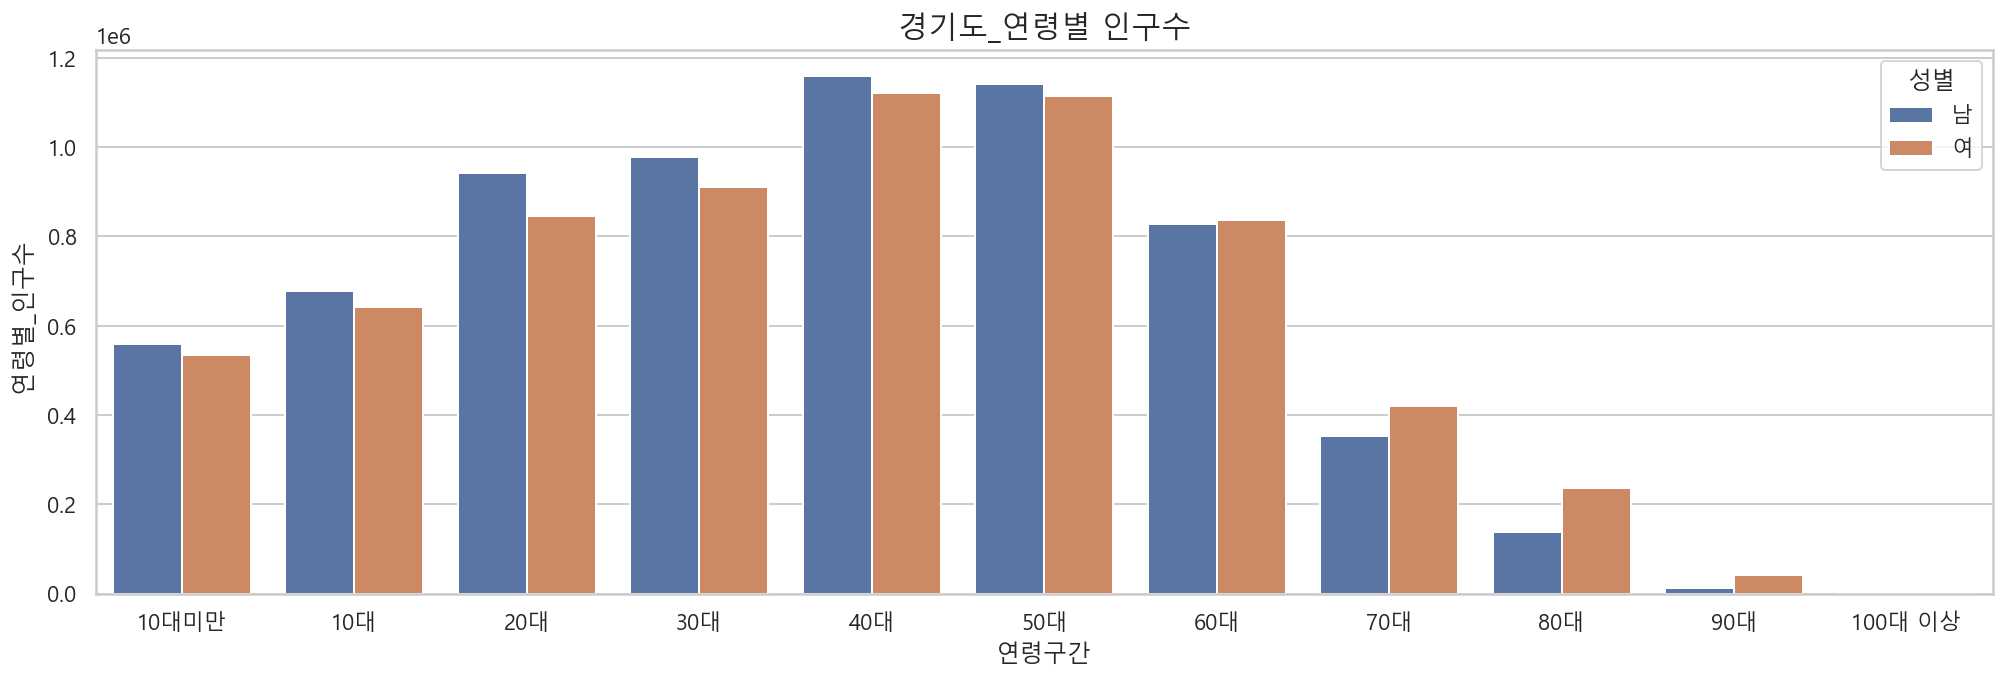

In [47]:
plt.figure(figsize=(17,5))
plt.title("경기도_연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_g, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()


#### 서울 연령별 인구수

- 20대, 30대, 40대, 50대의 인구수가 비슷하다는 것을 알 수 있다.

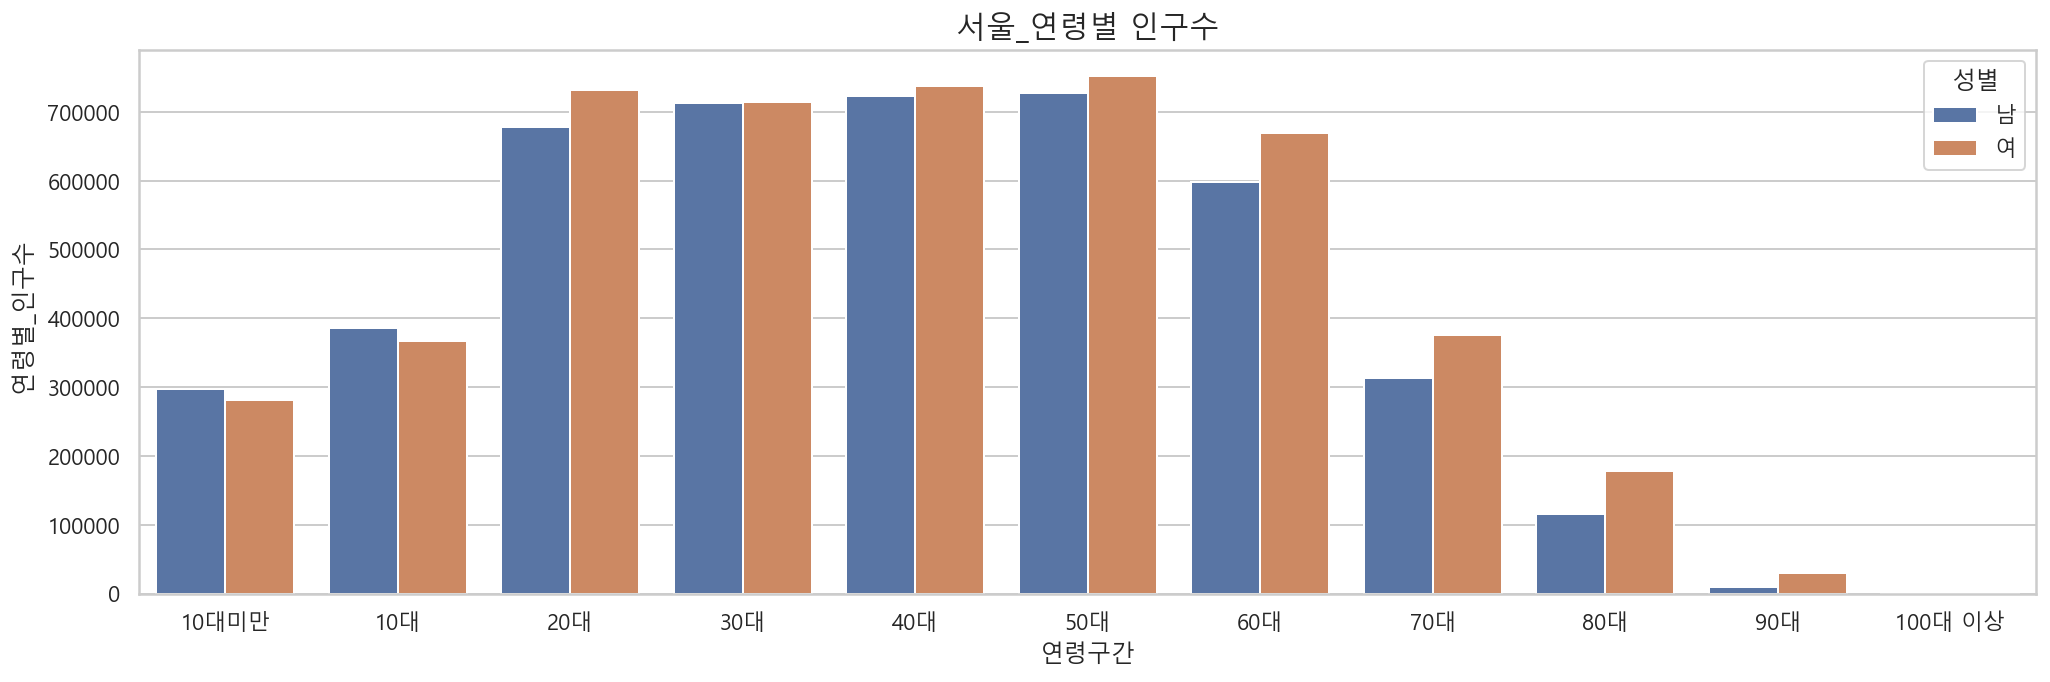

In [48]:
plt.figure(figsize=(17,5))
plt.title("서울_연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_s, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()


#### 부산 연령별 인구수

- 40대,50대,60대의 인구수가 많다는 것을 알 수 있다.

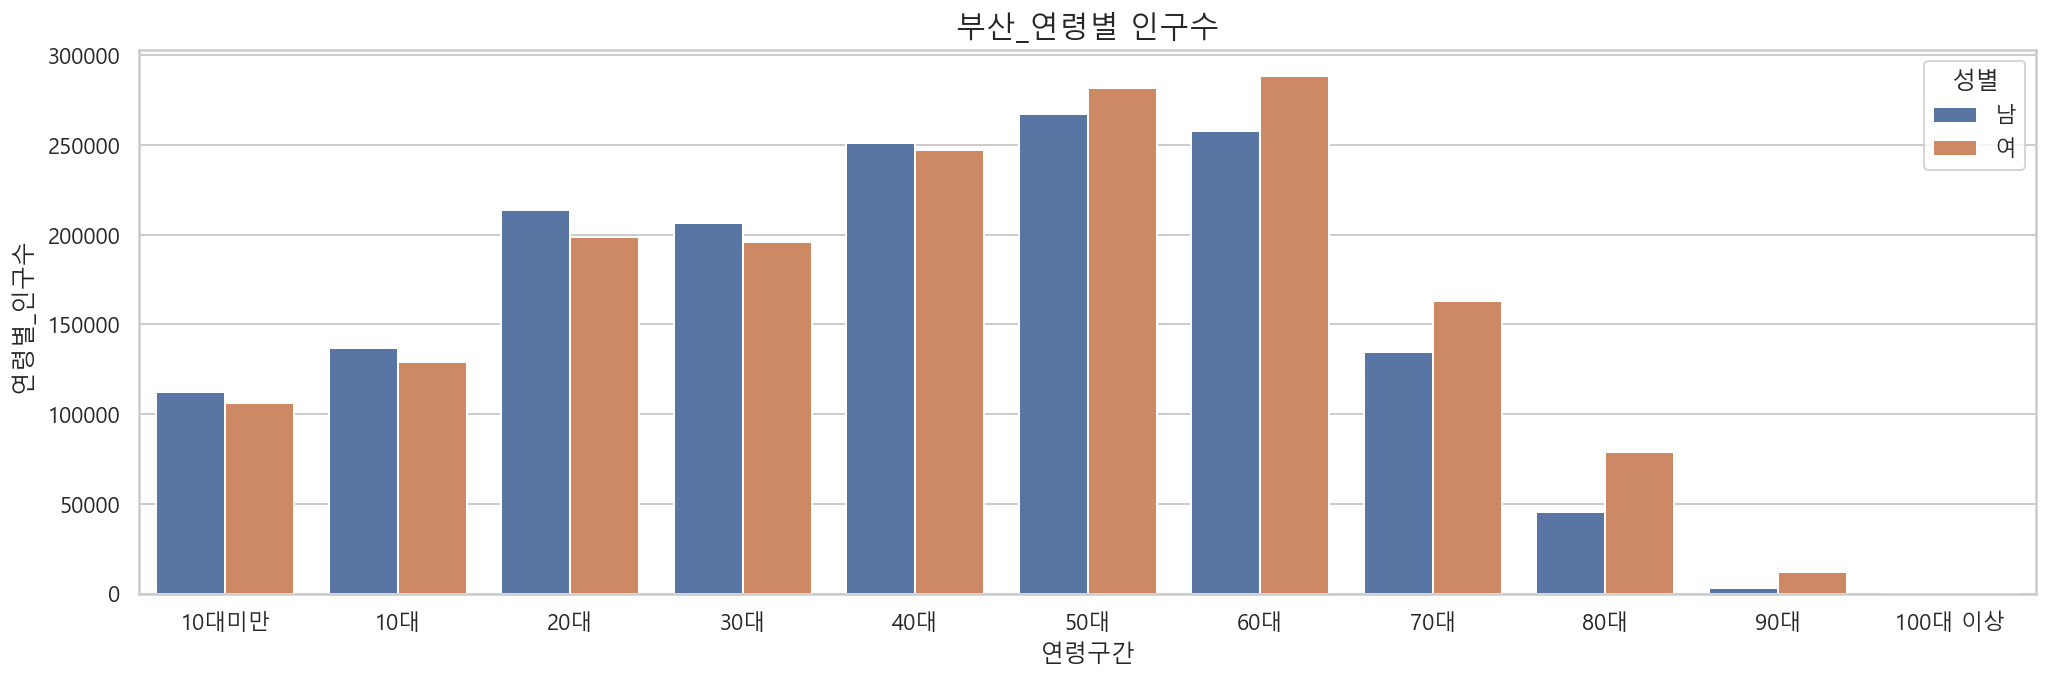

In [49]:

plt.figure(figsize=(17,5))
plt.title("부산_연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_b, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()


#### 경상남도 연령별 인구수

- 40대, 50대의 인구수가 많다는 것을 알 수 있다.

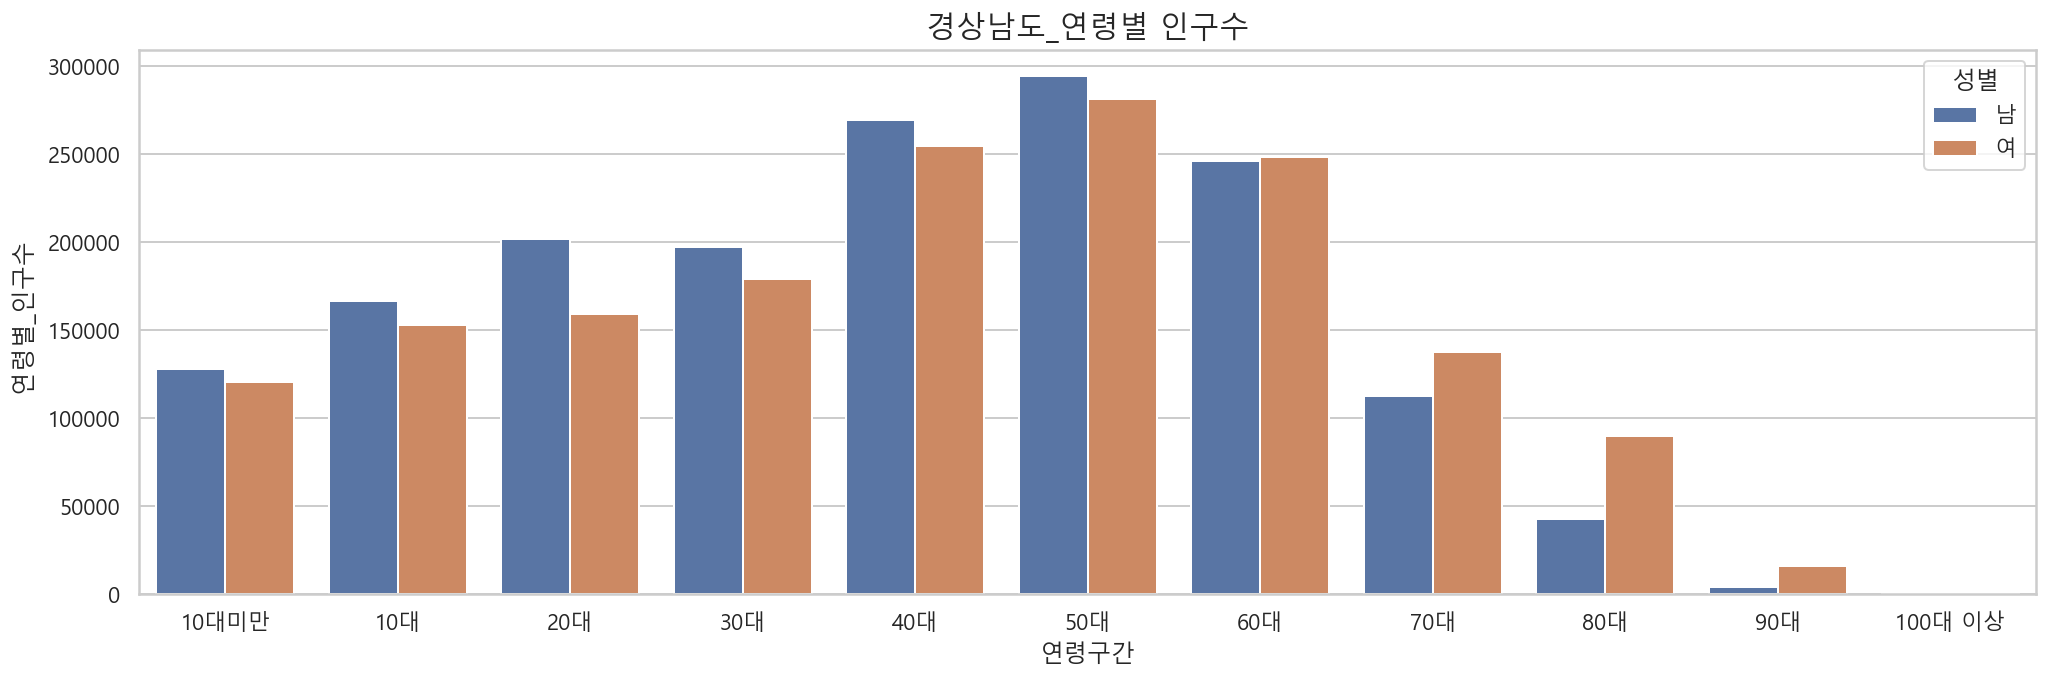

In [50]:
plt.figure(figsize=(17,5))
plt.title("경상남도_연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_gn, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()


#### 인천 연령별 인구수

- 40대, 50대의 인구수가 많다는 것을 알 수 있다.

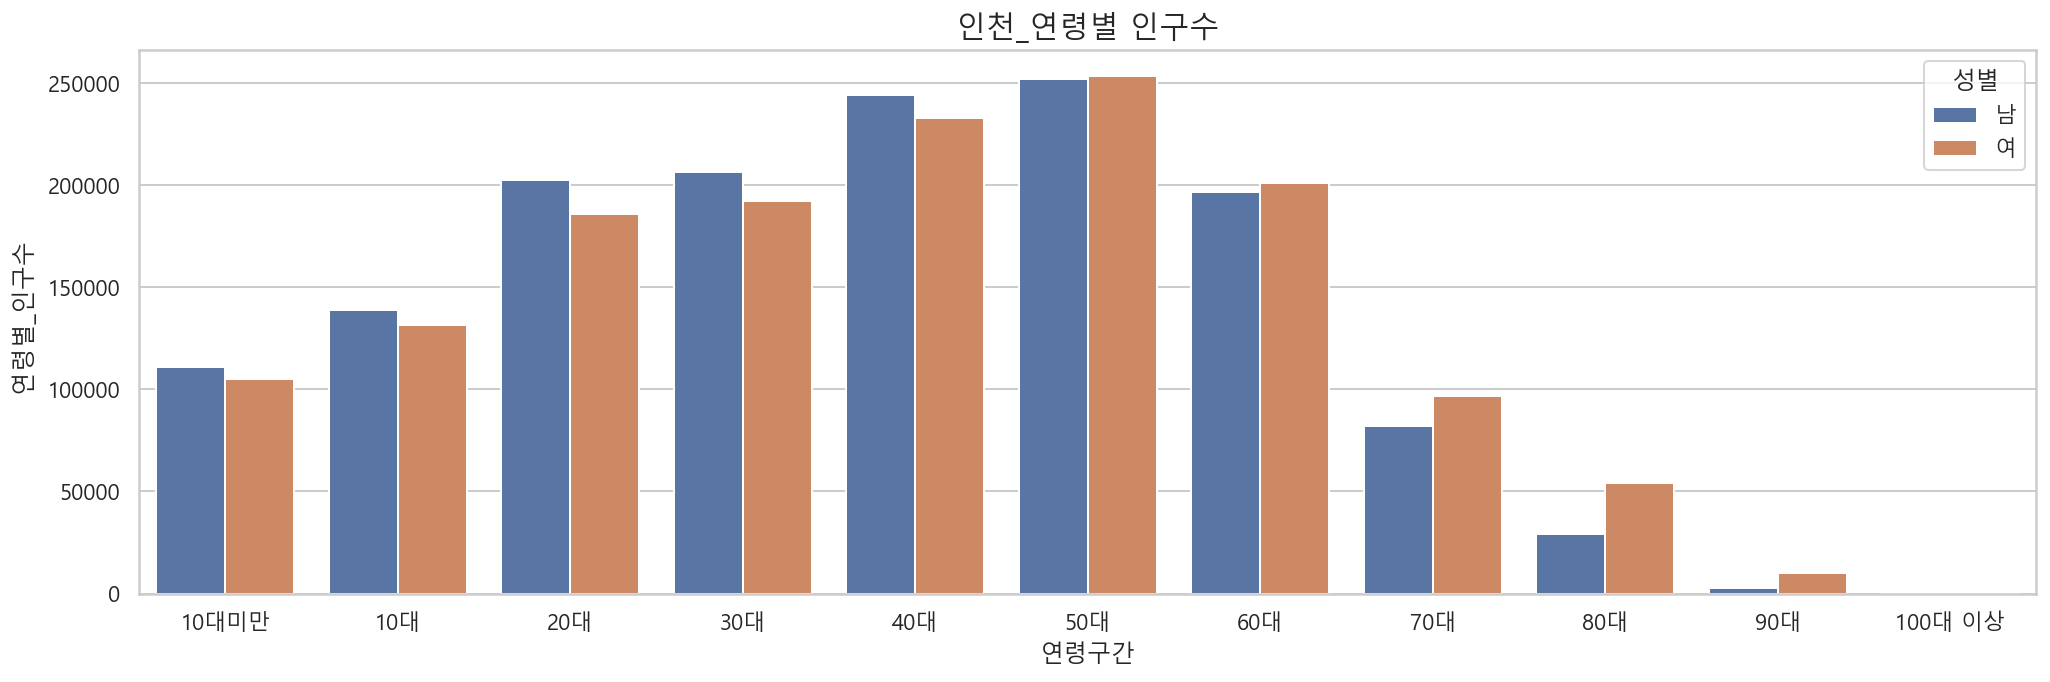

In [51]:
plt.figure(figsize=(17,5))
plt.title("인천_연령별 인구수", fontsize = 15)
sns.barplot(data=p_df_in, x="연령구간", y=" 연령별_인구수",hue="성별",ci=None)
plt.show()
